Table of Contents

1- About Our Dataset

2- Business Problem

3- Read In Our Dataset

4- First Look At the Data

5- Descriptive Stats

6- Calculate Probalities

7-Binomial Distibution

8- Normal Distribution

9- Conclusion

10- References

11- Appendix



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import iqr
import scipy.stats as stats
import pylab
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from scipy.stats import skew
from scipy.stats import kurtosis
import warnings
sns.set_style('whitegrid')
warnings.filterwarnings('ignore') # We can suppress the warnings
plt.style.use("fivethirtyeight")

C:\Users\andrew\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
from IPython.display import HTML

HTML('''<script>

code_show=true; 

function code_toggle() {

 if (code_show){

 $('div.input').hide();

 } else {

 $('div.input').show();

 }

 code_show = !code_show

} 

$( document ).ready(code_toggle);

</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
def generate_harvard_citation(author,year,title,url,access_date):
    citation= f'{author},{year}.{title}..Available at: {url} [Accesed] {access_date}]'
    return citation

In [4]:
# Example usage
author = "Tony Yiu"
year = "2019"
title ='Fun with the Binomial Distribution'
url = "https://medium.com/towards-data-science/fun-with-the-binomial-distribution-96a5ecabf65b"
access_date = "7-11-2023"
citation = generate_harvard_citation(author, year, title, url, access_date)
print(citation)

Tony Yiu,2019.Fun with the Binomial Distribution..Available at: https://medium.com/towards-data-science/fun-with-the-binomial-distribution-96a5ecabf65b [Accesed] 7-11-2023]


#  Data Visualisation

Data Visualisation Techniques When I was attempting to create the graphs, I made an effort to incorporate some of the Gestalt design concepts, such as the Good Figure, Proximity, Similarity, Continuation, Closure, and Symmetry principles.

Additionally, in an effort to focus our audience's attention on the information that was most essential, I made an effort to declutter the graph as much as possible.

As humans, we read in a pattern that resembles a z going from left to right. The part of a graph that we see at first in a chart is the top left corner, and we read in a pattern that resembles a z going to the right hand corner. The considerations that went into the design of our graphs are as follows:

There were a variety of charts used in our project, but the one that was utilised the most was a bar chart. There were a few explanations for this, including the fact that the nature of the data required the utilisation of these charts. In addition, there are those who believe that bar charts should be avoided because of how common they are; however, I would argue that this is the reason that should be utilised. The simplicity of the chart ensures that our audience will spend less time deciphering it and more time comprehending the data that we would like them to concentrate on.

When it comes to directing attention to what we consider to be the most significant parts our data, the most effective weapon at our disposal is colour. The purpose of the project was to make consistent use of colour, and as a result, to make it easier for our audience to interpret the graphs that we created. We have used a variation in colour to call attention to the graphs where we believe it is necessary to call attention to the most significant data points. People who are colour-blind find it most challenging to read in shades of red and green, which accounts for approximately 8% of males and 0.50% of women as a result we have not used shades of red or green.

# About Our Dataset

The data is related with direct marketing campaigns of a Portuguese banking institution.
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,
in order to access if the product (bank term deposit) would be (or not) subscribed.

The dataset is make up of 17 features and 4516 attributes.

Our  classification goal is to predict if the client will subscribe a term deposit (variable yes).

Number of Instances: (4521 for bank.csv)

Number of Attributes: 16 + output attribute.

Attribute information:

For more information, read [Moro et al., 2011].

    bank client data:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
   "blue-collar","self-employed","retired","technician","services")
   
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")
6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)


13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means
     client       was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")


17 - y - has the client subscribed a term deposit? (binary: "yes","no")

[Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology.

# Business Problem

A bank is interested in improving its marketing strategies to target potential customers more effectively. 
They have collected data on previous marketing campaigns, including information about the customers 
contacted and whether they subscribed to a term deposit or not. The bank aims to gain insights into 
customer behaviour and the success of their marketing efforts

# Read in our Dataset

In [5]:
df=pd.read_csv("Bank_Mkt_Campaign (1).csv")

In [6]:
df.head(-5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4511,46,blue-collar,married,secondary,no,668,yes,no,unknown,15,may,1263,2,-1,0,unknown,yes
4512,40,blue-collar,married,secondary,no,1100,yes,no,unknown,29,may,660,2,-1,0,unknown,no
4513,49,blue-collar,married,secondary,no,322,no,no,cellular,14,aug,356,2,-1,0,unknown,no
4514,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no


# First Look at the Data

<function matplotlib.pyplot.show(close=None, block=None)>

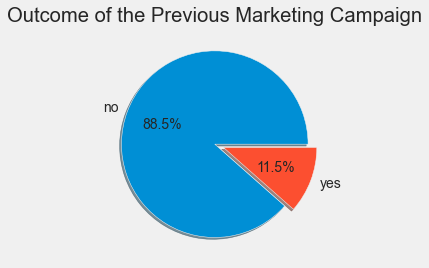

In [7]:
df['y'].value_counts().plot.pie(explode=[0,0.1], autopct = "%1.1f%%", shadow = True)

plt.title("Outcome of the Previous Marketing Campaign")
plt.ylabel("")
plt.show

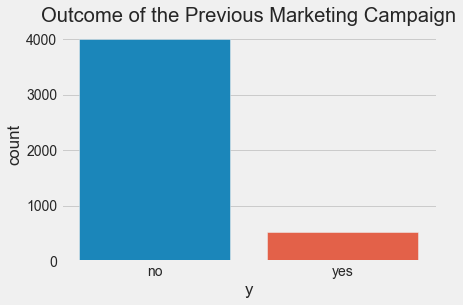

In [8]:
sns.countplot("y",data=df)
plt.title('Outcome of the Previous Marketing Campaign')

plt.show()

In [9]:
total_signed_up=len(df[df['y']=='yes'])
total_contacts=len(df)
Conversion_rate=(total_signed_up/total_contacts)*100
print("The Conversion Rate from the previous marketing campaign is: {:.2f}%".format(Conversion_rate))

The Conversion Rate from the previous marketing campaign is: 11.52%


In [10]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no


Observation - We can see from the previous campaign there was 11.5% success rate. We can consider these percentages as our observed probabilities. We can use these percentages as a benchmark for any new marketing campaign we propose.

To test our conclusion we will use hypothesis testing, we can use our observed probabilities as our null hypothesis(H0) and test against an alternative hypothesis(Ha) to determine if there is a significant difference in a new marketing campaign.

We can use statistical tests such as chi-squared tests or Z- tests to assess the significance of the differences and draw conclusions about the effectiveness of a new marketing campaign.

Why use Statistics for our Business Problem Our dataset is a collection of facts. It can be consideres a raw form of knowledge. Within our dataset we have two forms of data qualitative(ordinal & nominal) & quantitative( discrete & categorical) We gain information by analysing & interpreting the data within our data. Data analysis allows us to conduct research and process the results effectively. We also find the pattern and relationships within the data to make correct predictions this allows to apply statistical methods to build machine learning models

unknown,unknown.Mathematics - Statistics & Probability mastery for Data Science, Machine Learning..Available at: https://www.udemy.com/course/statistics-probability-for-data-science/learn/lecture/35290462#overview [Accesed] 1-11-2023]

# Descriptive Stats

In Descriptive stats we identify  Measures of central tendency mean,median & mode. they are important as they give a concise summary of our data in one value, this can help us in data interpreation,comparison,estimation,inference,modeling,decision making,communicaation, & outlier detection.

We also use measures of dispersion to calulate the variability of our data, this can help understand how far they are away from the central value.

we also use measures od position such as quartiles and percentiles to measure the location od oor data value helping us understand the distributon of the data.

In [11]:
df.shape

(4521, 17)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [13]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [14]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


Observation- We can get an initial feel for our data. We can that some of our columns may be skewed and have outliers by observing our descriptive stats such as mean median std etc

In [15]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


Observation - we can observe that we 13 features and 4521 attributes, we have no missing values. we have 8 object columns(strings) & 4 int64 columns(numerical). We can also state we have a sample size of 4521

In [16]:
df_num=df.select_dtypes(include=['number'])
df_cat=df.select_dtypes(include=['object'])

In [17]:
df_num[['age', 'balance', 'duration', 'campaign', 'previous']].mean()

age           41.170095
balance     1422.657819
duration     263.961292
campaign       2.793630
previous       0.542579
dtype: float64

Observation - The mean is the average of our dataset. however the mean is not robust to outliers as all the values are include in the metric. we can observe this with the balance column where outliers could distort the mean figure.

In [18]:
df_num[['age', 'balance',  'duration', 'campaign', 'previous']].median()

age          39.0
balance     444.0
duration    185.0
campaign      2.0
previous      0.0
dtype: float64

Observation - We can observe that there is outliers in our balance & duration columns. On this basis we will us median as it is a more accurate measure of the centre of our data.

In [19]:
df_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [20]:
df_cat[['job', 'marital',  'education', 'default',  'housing','loan','month','y']].mode()

,job,marital,education,default,housing,loan,month,y
0,management,married,secondary,no,yes,no,may,no


Observation- we use the mode on our categorical data to get the most common categories in our data.What is interesting here is that the most common job is classed as management however the most common of educational attainment is secondary school.

In [21]:
selected_cols= ['age', 'balance', 'duration', 'campaign', 'previous']

min_values=df[selected_cols].min()# Calculate the minimum & maximum values for our columns
max_values=df[selected_cols].max()

col_ranges= max_values - min_values # Calculate the range for our selected columns

# Create a dataframe to display our results
result_df=pd.DataFrame({'Min Value is' : min_values,'Max value is':max_values, 'Range value is': col_ranges})

print(result_df)

          Min Value is  Max value is  Range value is
age                 19            87              68
balance          -3313         71188           74501
duration             4          3025            3021
campaign             1            50              49
previous             0            25              25


In [22]:
df_num[['age', 'balance',  'duration', 'campaign',  'previous']].std()

age           10.576211
balance     3009.638142
duration     259.856633
campaign       3.109807
previous       1.693562
dtype: float64

In [23]:
df_num[['age', 'balance',  'duration', 'campaign', 'previous']].var()

age         1.118562e+02
balance     9.057922e+06
duration    6.752547e+04
campaign    9.670897e+00
previous    2.868153e+00
dtype: float64

The above measurements are fundamental for data profiling, quality assessment and initial data exploration. These measurments help us make decisions about data analysis and visualizations, helpin us derive meaningful insights from our data. We can observe that our balance and duration will need further investigaation as they contain outliers. This will skew our data and not help us to make accurate predictions 

In [24]:
from scipy.stats import kurtosis
selected_cols= ['age', 'balance',  'duration', 'campaign', 'previous']

kurtosis_values=kurtosis(df_num[selected_cols],fisher=True)

# Create a dataframe to display our results
result_df=pd.DataFrame({'Column Name' : selected_cols, 'Pearsons Kurtosis': kurtosis_values})

print(result_df)

  Column Name  Pearsons Kurtosis
0         age           0.347063
1     balance          88.291280
2    duration          12.514870
3    campaign          37.126499
4    previous          51.936398


In [25]:

selected_cols= ['age', 'balance',  'duration', 'campaign', 'previous']

kurtosis_values=kurtosis(df_num[selected_cols],fisher=False)

# Create a dataframe to display our results
result_df=pd.DataFrame({'Column Name' : selected_cols, 'Fisher Kurtosis': kurtosis_values})

print(result_df)

  Column Name  Fisher Kurtosis
0         age         3.347063
1     balance        91.291280
2    duration        15.514870
3    campaign        40.126499
4    previous        54.936398


In [26]:
from scipy.stats import skew
selected_cols= ['age', 'balance',  'duration', 'campaign', 'previous']

skew_values=skew(df_num[selected_cols])

# Create a dataframe to display our results
result_df=pd.DataFrame({'Column Name' : selected_cols, 'Skew': skew_values})

print(result_df)

  Column Name      Skew
0         age  0.699269
1     balance  6.594242
2    duration  2.771500
3    campaign  4.742340
4    previous  5.873309


In [27]:
df_cat[['job', 'marital',  'education', 'default',  'housing','loan','month','y']].mode()

,job,marital,education,default,housing,loan,month,y
0,management,married,secondary,no,yes,no,may,no


In [28]:
d = {'no': 0, 'yes': 1,}
df['y'] = df['y'].map(d)

In [29]:
new_cols={"y":'Term Deposit'}
df=df.rename(columns=new_cols)

In [30]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Term Deposit'],
      dtype='object')

In [31]:
df['month'].unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [32]:
month_to_num={'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,
             'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
df['month']=df['month'].map(month_to_num)
month_to_qtr = {1:1,2:1,3:1,4:2,5:2,6:2,7:3,8:3,9:3,10:4,11:4,12:4}
df['Qtr']=df['month'].map(month_to_qtr)

In [33]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term Deposit,Qtr
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,10,79,1,-1,0,unknown,0,4
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,5,220,1,339,4,failure,0,2


In [34]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Term Deposit', 'Qtr'],
      dtype='object')

In [35]:
unique_campaign=df['campaign'].unique()
print(unique_campaign)

[ 1  4  2  5  3  6 18 10  9  7 12 14 13 24 11  8 29 32 16 22 15 30 25 21
 17 19 23 20 50 28 31 44]


In [36]:
unique_campaign=df['campaign'].unique()

if 0 in unique_campaign:
    print('There was no  contact made by the bank to  every customer during this campaign')
else:
    print('There was contact made by the bank to every customer during this campaign')

There was contact made by the bank to every customer during this campaign


In [37]:
unique_previous=df['previous'].unique()
print(unique_previous)

[ 0  4  1  3  2  5 20  7  6 10  9  8 18 19 12 13 11 14 15 24 17 22 23 25]


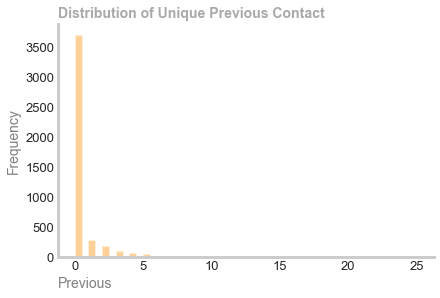

In [38]:
sns.set_style('whitegrid')
sns.distplot(df['previous'],kde=False,color='darkorange')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Previous',fontsize=14,color='grey',loc='left')
plt.ylabel('Frequency',fontsize=14,color= 'grey')
plt.title('Distribution of Unique Previous Contact',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
sns.despine()
plt.grid(False)

plt.show()

In [39]:
unique_term=df['Term Deposit'].unique()
print(unique_term)

[0 1]


In [40]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term Deposit,Qtr
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,10,79,1,-1,0,unknown,0,4
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,5,220,1,339,4,failure,0,2


In [41]:
df_num=df.select_dtypes(include=['number'])

In [42]:
df_num.head(2)

,age,balance,day,month,duration,campaign,pdays,previous,Term Deposit,Qtr
0,30,1787,19,10,79,1,-1,0,0,4
1,33,4789,11,5,220,1,339,4,0,2


<AxesSubplot:>

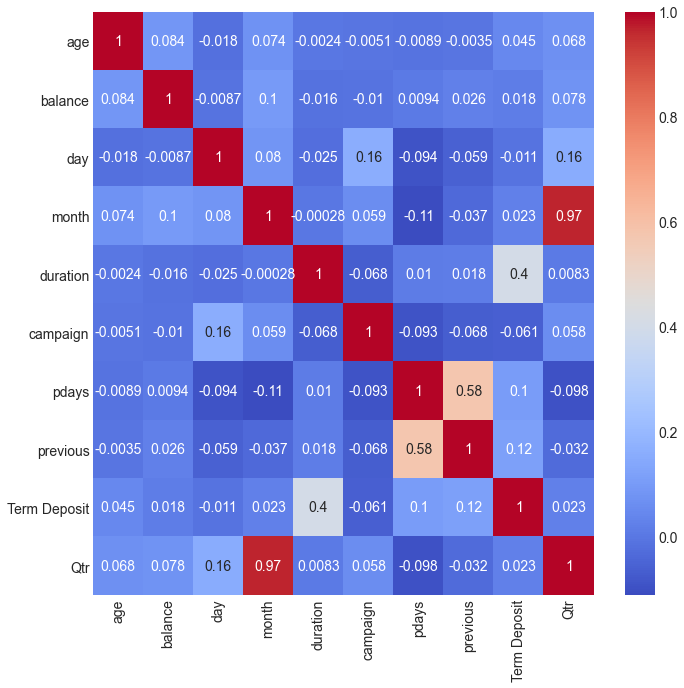

In [43]:
common_figsize=(8,6)
plt.figure(figsize=(10,10))
sns.heatmap(df_num.corr(),cmap ='coolwarm',annot=True)

In [44]:
correlation=df['duration'].corr(df['Term Deposit'].astype(int))
print(f'Pearson Correlation Coefficient: {correlation}')

if correlation > 0:
    print("There's a positive correlation between high-duration calls and '1' in 'Term Deposit'.")
elif correlation < 0:
    print('There is a negative correlation')
else:
    print('There is little  or no correlation')
    

Pearson Correlation Coefficient: 0.4011183032752401
There's a positive correlation between high-duration calls and '1' in 'Term Deposit'.


In [45]:
df['duration'].mean()

263.96129174961294

In [46]:
df['duration'].median()

185.0

In [47]:
df['duration'].std()

259.85663262468245

In [48]:
df['duration'].skew()

2.7724197169136455

In [49]:
df['duration'].kurtosis()

12.530049737749446

<function matplotlib.pyplot.show(close=None, block=None)>

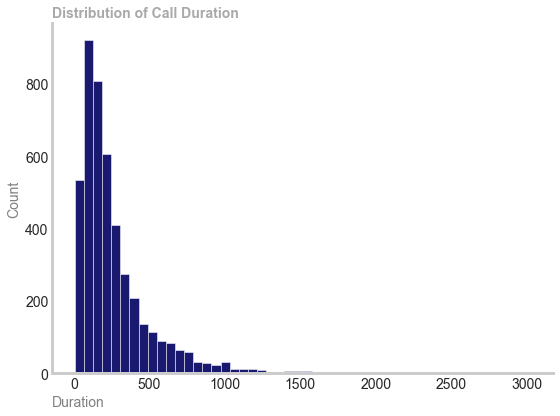

In [50]:
sns.set_style('whitegrid')
duration_data=df['duration']

plt.figure(figsize=(8,6))
plt.hist(duration_data,bins=50,color='midnightblue')
plt.xlabel('Duration',fontsize=14,color='grey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')
plt.title('Distribution of Call Duration',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
sns.despine()
plt.grid(False)
plt.show

Observation -From our correlation plot we could observe that there was a correaltion between call duration and term deposit as can be seen by the graph but if we think about it there should be correlation as a person who reacts in the postive form a bank employee( Would you like to open a Term Deposit is more likely to have a call off long duration. We can use this feature in our analysis as it is biased.

# Age

We will focus on the age column. in the context of our data term deposit is a dependent feature whereas Age is an independent feature.An example of this is no person under 18 who has opened a term deposit which makes sense as the majority of people under 18 would be working and not have the funds to open a term deposit account. It is also useful to look at the age profile to ascertain if there is a normal distribution in our data as will help us understand the potential groups may respond to marketing campaign.

In [51]:
mean_age=df_num['age'].mean()
median_age=df_num['age'].median()
std_age=df_num['age'].std()
skew_df=df_num['age'].skew()
kurtosis_df=df_num['age'].kurtosis()


percentiles= [0.25,0.50,0.75]
age_percentiles= df_num['age'].quantile(percentiles)

print(f"Mean Age is:{mean_age}")
print(f"Median Age is:{median_age}")
print(f"Standard Deviation is:{std_age}")
print(f"Median Age is:{median_age}")
print(f"Skew is:{skew_df}")
print(f"kurtosis is:{kurtosis_df}")
print('Age Percentiles')
for percentile, age_value in zip(percentiles,age_percentiles):
    print(f"{percentiles}th Percentile: {age_value}")

Mean Age is:41.17009511170095
Median Age is:39.0
Standard Deviation is:10.576210958711275
Median Age is:39.0
Skew is:0.6995014533559305
kurtosis is:0.3487754872611486
Age Percentiles
[0.25, 0.5, 0.75]th Percentile: 33.0
[0.25, 0.5, 0.75]th Percentile: 39.0
[0.25, 0.5, 0.75]th Percentile: 49.0


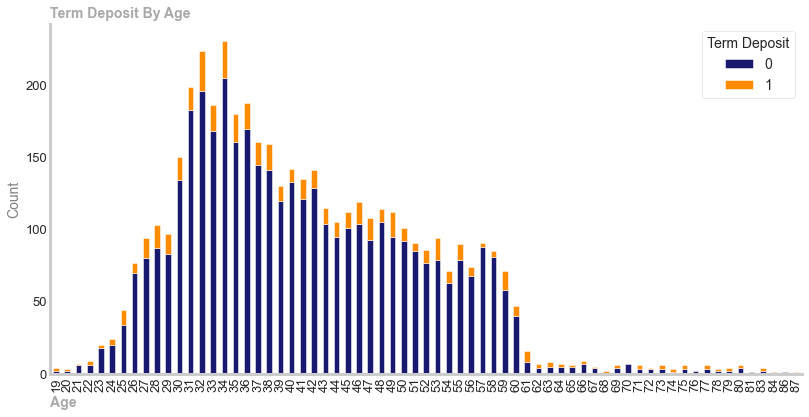

In [52]:
colors=['midnightblue','darkorange']
sns.set_style('whitegrid')
count_data=df.groupby(['age','Term Deposit'])['Term Deposit'].count().unstack()
count_data.plot(kind='bar', stacked=True, figsize=(12,6),color=colors)
plt.xlabel('Age',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')
plt.title('Term Deposit By Age',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.despine()
plt.grid(False)
plt.show()

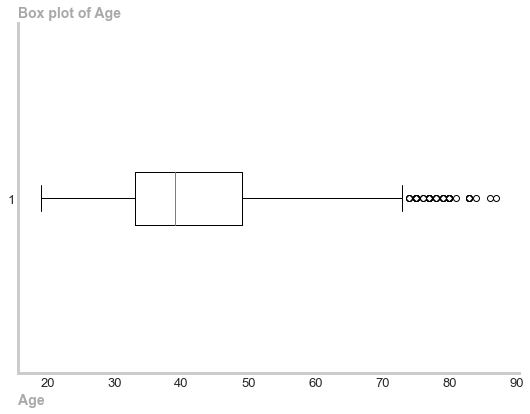

In [53]:
age_data=df_num['age']
plt.figure(figsize=(8,6))
plt.boxplot(age_data, vert=False)
plt.xlabel('Age',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.title('Box plot of Age',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
sns.despine()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(False)
plt.show()

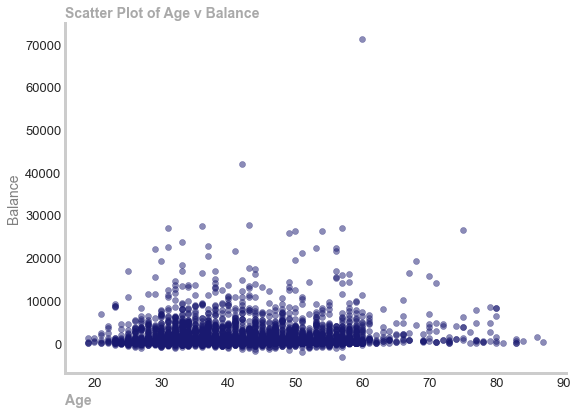

In [54]:
x=df_num['age']
y=df_num['balance']
plt.figure(figsize=(8,6))
plt.scatter(x,y, alpha=0.5,color='midnightblue')
plt.xlabel('Age',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Balance',fontsize=14,color= 'grey')
plt.title('Scatter Plot of Age v Balance',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.despine()
plt.grid(False)
plt.show()

In [55]:
age_bins=[20,30,40,50,60]
age_labels=['20-29','30-39','40-49','50-59']

df['age']= pd.cut(df['age'], bins=age_bins, labels=age_labels, include_lowest=True)

contingency_table= pd.crosstab(df['age'],df['Term Deposit'], margins=True)
print(contingency_table)

Term Deposit     0    1   All
age                          
20-29          540   88   628
30-39         1622  178  1800
40-49         1039  123  1162
50-59          718   82   800
All           3919  471  4390


In [56]:
probabilities=contingency_table/contingency_table.loc['All']
print(probabilities)

Term Deposit         0         1       All
age                                       
20-29         0.137790  0.186837  0.143052
30-39         0.413881  0.377919  0.410023
40-49         0.265119  0.261146  0.264692
50-59         0.183210  0.174098  0.182232
All           1.000000  1.000000  1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

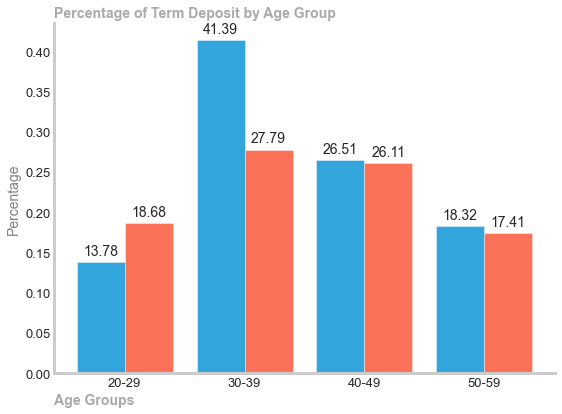

In [57]:
colors=['midnightblue','darkorange']
age_groups=['20-29','30-39','40-49','50-59']
term_deposit_0 = [0.137790,0.413881,0.265119,0.183210]
term_deposit_1 =[0.186837,0.277919,0.261146,0.174098]
width=0.40
x= range(len(age_groups))
fig,ax = plt.subplots(figsize=(8,6))
bar1= ax.bar(x,term_deposit_0,width,label='Term Deposit 0', alpha=0.8)
bar2= ax.bar([i + width for i in x],term_deposit_1,width,label='Term Deposit 1', alpha=.8)
ax.set_xlabel('Age Groups',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
ax.set_ylabel('Percentage',fontsize=14,color= 'grey')
ax.set_title('Percentage of Term Deposit by Age Group',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
ax.set_xticks([i+ width/2 for i in x])
ax.set_xticklabels(age_groups)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.legend
for i in x:
    ax.text(i,term_deposit_0[i] + 0.01/2, f'{term_deposit_0[i]*100:.2f}', ha='center',va='bottom')
    ax.text(i + width,term_deposit_1[i] + 0.01/2, f'{term_deposit_1[i]*100:.2f}', ha='center',va='bottom')   
sns.despine()
plt.grid(False)
plt.show

Takeaways From Age Feature.

1- Mean age of our population is 41.17 years

2- Median age of our population is 39.00 years

3- Standard deviation is 10.58 years this would suggest that the ages in our population are not tightly clustered around the mean but are are spread out.

4- Age percentiles 75% of our population are under the age of 49 years 

5- Skew .69 suggests that our population is postively skewed meaning we have a long tail to the right, it indicates the majority have ages below the mean of 41,17 years.

6- Kurtosis .34 a playkutric distribution with a value less than 3. this would suggest that the majority have an age the is closer to the mean.

7- Box plots a measure of the 5 numbers in statistics confirms what our descriptive stats have shown.However it show that we have outliers. In the context of resources available they or may not be important.

8- Scatter plot. Confirms that their are outliers in our balance feature, but also confirms that outliers in our age feature do not form a high income group and we will discard  them.

9- Contingency table- Probabilities- This will be a important table when we formulate a marketing campaign. we can say that if a person opens a term deposit there is an 82% proability they will be from the 20-49 age cohort. 

# Balance

We wiil have a look at the balance variable. When the bank offers a term deposit to its customers it is hoping that customers will sign up and move their funds from their deposit account to a term deposit. The most important variable is to have the ability to do so.

In [58]:
unique_balance=df['balance'].unique()
print(unique_balance)

[ 1787  4789  1350 ...  -333 -3313  1137]


In [59]:
total_balance = df['balance'].sum()
print("Total Balance in all accounts is:", total_balance)

Total Balance in all accounts is: 6431836


In [60]:
mean_age=df_num['balance'].mean()
median_age=df_num['balance'].median()
std_age=df_num['balance'].std()
skew_df=df_num['balance'].skew()
kurtosis_df=df_num['balance'].kurtosis()

min_balance=df_num['balance'].min()
max_balance=df_num['balance'].max()
range_balance= max_balance-min_balance

percentiles= [0.25,0.50,0.75]
balance_percentiles= df_num['balance'].quantile(percentiles)

min_balance=df_num['balance'].min()
max_balance=df_num['balance'].max()

print(f"Mean Balance is: {mean_age}")
print(f"Median Balance is: {median_age}")
print(f"Standard Deviation is: {std_age}")
print(f"Median Balance is: {median_age}")
print(f"Skew is: {skew_df}")
print(f"kurtosis is: {kurtosis_df}")
print(f"Min Balance is is: {min_balance}")
print(f"Max Balance is: {max_balance}")
print(f"Range is: {range_balance}")
print('Balance Percentiles')
for percentile, range_balance in zip(percentiles,balance_percentiles):
    print(f"{percentiles}th Percentile: {range_balance}")

Mean Balance is: 1422.6578190665782
Median Balance is: 444.0
Standard Deviation is: 3009.6381424673496
Median Balance is: 444.0
Skew is: 6.596430546295735
kurtosis is: 88.39033211861796
Min Balance is is: -3313
Max Balance is: 71188
Range is: 74501
Balance Percentiles
[0.25, 0.5, 0.75]th Percentile: 69.0
[0.25, 0.5, 0.75]th Percentile: 444.0
[0.25, 0.5, 0.75]th Percentile: 1480.0


In [61]:
df['balance'] = pd.to_numeric(df['balance'], errors='coerce')
balance_bins=[500,1000,2000,5000,10000,20000,50000,100000]
balance_labels=['0-500','501-1000','1001-1500','1501-2000','2001-2500','2501-50000','50001-100000']

df['balance']= pd.cut(df['balance'], bins=balance_bins, labels=balance_labels, include_lowest=True)

contingency_table= pd.crosstab(df['balance'],df['Term Deposit'], margins=True)
print(contingency_table)

Term Deposit     0    1   All
balance                      
0-500          575   81   656
501-1000       514   80   594
1001-1500      471  107   578
1501-2000      188   29   217
2001-2500       68    4    72
2501-50000      18    1    19
50001-100000     1    0     1
All           1835  302  2137


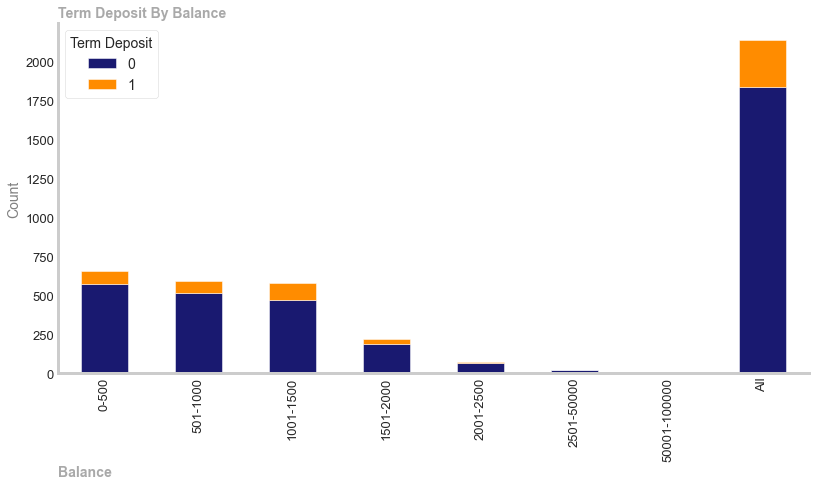

In [62]:
colors=['midnightblue','darkorange']
sns.set_style('whitegrid')
count_data=contingency_table.drop('All',axis=1)
count_data.plot(kind='bar', stacked=True, figsize=(12,6),color=colors)
plt.xlabel('Balance',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')
plt.title('Term Deposit By Balance',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
sns.despine()
plt.grid(False)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [63]:
probabilities=contingency_table/contingency_table.loc['All']
print(probabilities)

Term Deposit         0         1       All
balance                                   
0-500         0.313351  0.268212  0.306972
501-1000      0.280109  0.264901  0.277960
1001-1500     0.256676  0.354305  0.270473
1501-2000     0.102452  0.096026  0.101544
2001-2500     0.037057  0.013245  0.033692
2501-50000    0.009809  0.003311  0.008891
50001-100000  0.000545  0.000000  0.000468
All           1.000000  1.000000  1.000000


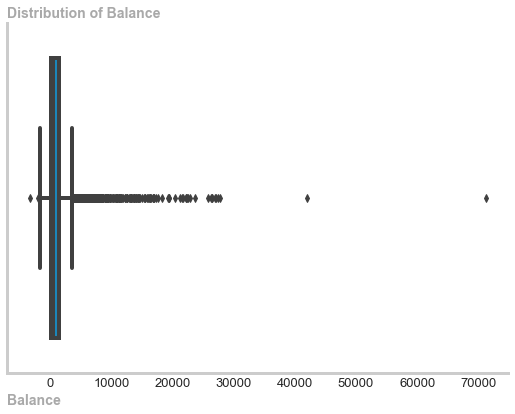

In [64]:
df_num['balance'] = pd.to_numeric(df_num['balance'], errors='coerce')
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_num, x='balance')
plt.title('Distribution of Balance',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Balance',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
sns.despine()
plt.grid(False)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

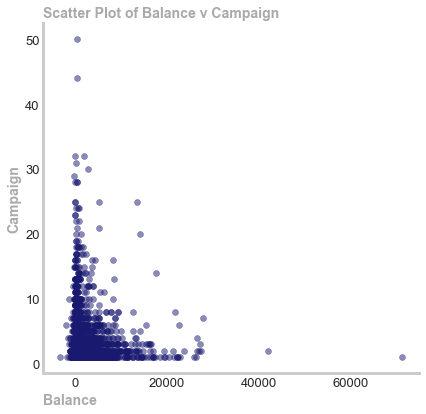

In [65]:
x=df_num['balance']
y=df_num['campaign']
plt.figure(figsize=(6,6))
plt.scatter(x,y, alpha=0.5,color='midnightblue')
plt.xlabel('Balance',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Campaign',fontsize=14,fontweight='bold',color='darkgrey')
plt.title('Scatter Plot of Balance v Campaign',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.despine()
plt.grid(False)
plt.show()

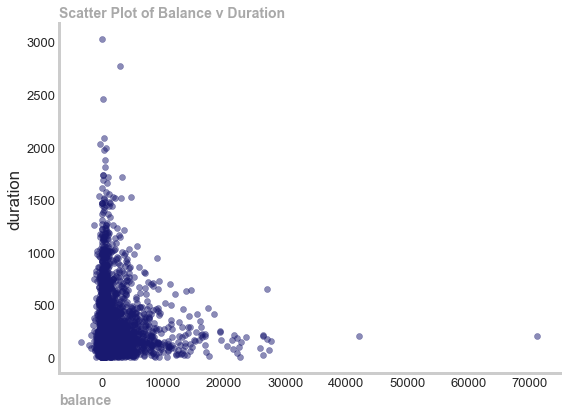

In [66]:
x=df_num['balance']
y=df_num['duration']
plt.figure(figsize=(8,6))
plt.scatter(x,y, alpha=0.5,color='midnightblue')
plt.xlabel('balance',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('duration')
plt.title('Scatter Plot of Balance v Duration',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
sns.despine()
plt.grid(False)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

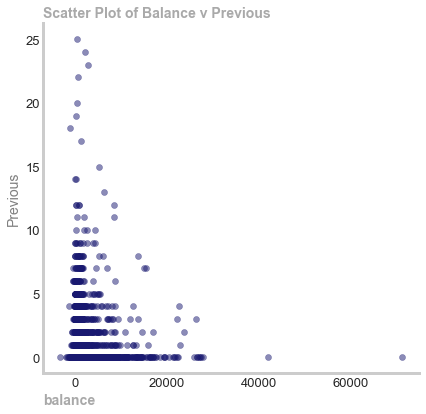

In [67]:
x=df_num['balance']
y=df_num['previous']
plt.figure(figsize=(6,6))
plt.scatter(x,y, alpha=0.5,color='midnightblue')
plt.xlabel('balance',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Previous',fontsize=14,color= 'grey')
plt.title('Scatter Plot of Balance v Previous',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
sns.despine()
plt.grid(False)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

Takeaway From  Balance

1- Mean Cash Balance of our population is 1422.00 euros

2- Median Cash Balance of our population is 444.00 euros

3- Standard deviation is 3009.00 euros this would suggest that the cash balances in our population are widely spread out.

4- Balance percentiles 75% of our population have a cash balance of 1480.00 euros or under 

5- Skew 6.59 suggests that our population is highly postively skewed meaning we have a long tail to the right, it indicates the majority of cash balances are below the mean.

6- Kurtosis 88.39 a leptokurtic distribution with a value more than 3. this would suggest that thdata is heavily influenced by extreme outliers(big cash balances) it also suggest that most cash balances are clusteres around the mean which creates sharp peaks and thicker tails

7- Box plots a measure of the 5 numbers in statistics confirms what our descriptive stats have shown that th data is infuenced by extreme outliers.

8- Scatter plot. show no linear correlation between balance and other numerical values.

9- Contingency table- Probabilities- We will compare some of the bands

0-500 31% probability No Term Deposit/26% probability yes Term Deposit
500-1000 28% probability No Term Deposit/26% probability yes Term Deposit
1000-1500 25% probability No Term Deposit/34% probability yes Term Deposit
1500-2000 10% probability No Term Deposit/9% probability yes Term Deposit
2000-2500 37% probability No Term Deposit/13% probability yes Term Deposit


One would expect the more disposal income the greather the proability would be that they would have a term deposit, however we seem to be observing the opposite. It could suggest that the previous campaign was haphazard and failed to prioritize higher income groups.


# Probalities

In [68]:
new_cols={"y":'Term Deposit'}
df_cat=df_cat.rename(columns=new_cols)

In [69]:
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,Term Deposit
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no


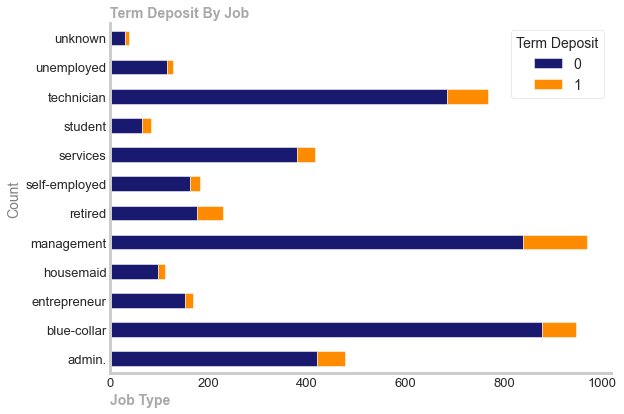

Term Deposit      0    1   All
job                           
admin.          420   58   478
blue-collar     877   69   946
entrepreneur    153   15   168
housemaid        98   14   112
management      838  131   969
retired         176   54   230
self-employed   163   20   183
services        379   38   417
student          65   19    84
technician      685   83   768
unemployed      115   13   128
unknown          31    7    38
All            4000  521  4521


In [70]:
colors=['midnightblue','darkorange']
count_data=df.groupby(['job','Term Deposit'])['Term Deposit'].count().unstack()
count_data.plot(kind='barh', stacked=True, figsize=(8,6),color=colors)
plt.xlabel('Job Type',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')
plt.title('Term Deposit By Job',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.despine()
plt.grid(False)
plt.show()
pd.crosstab(df['job'],df['Term Deposit'], margins=True)
contingency_table= pd.crosstab(df['job'],df['Term Deposit'], margins=True)
print(contingency_table)

In [71]:
probabilities=contingency_table.div(contingency_table['All'],axis=0)
print(probabilities)

Term Deposit          0         1  All
job                                   
admin.         0.878661  0.121339  1.0
blue-collar    0.927061  0.072939  1.0
entrepreneur   0.910714  0.089286  1.0
housemaid      0.875000  0.125000  1.0
management     0.864809  0.135191  1.0
retired        0.765217  0.234783  1.0
self-employed  0.890710  0.109290  1.0
services       0.908873  0.091127  1.0
student        0.773810  0.226190  1.0
technician     0.891927  0.108073  1.0
unemployed     0.898438  0.101562  1.0
unknown        0.815789  0.184211  1.0
All            0.884760  0.115240  1.0


Observation Some strange probalities here. We can see the population of jobs we can see that there is a 23% that person will be retired followed by a 22% probability they will be a student, with a blue collar only having a 7% probability. What we can the occupations with the highest proabilties tend to be at home for most of the day. The bank is using the phone to contact people so we have to assume that is dataset  and the calls are made from 9 in the morning to 5 in the evening and to a home address

This is really important as we have observed through our analyis that there is sampling bias in our dataset as most of the potential targret market have not had the opportunity to get a term deposit account as they had not being contacted.

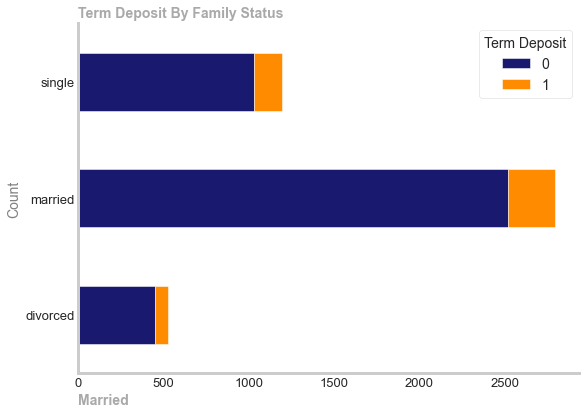

Term Deposit     0    1   All
marital                      
divorced       451   77   528
married       2520  277  2797
single        1029  167  1196
All           4000  521  4521


In [72]:
colors=['midnightblue','darkorange']
count_data=df.groupby(['marital','Term Deposit'])['Term Deposit'].count().unstack()
count_data.plot(kind='barh', stacked=True, figsize=(8,6),color=colors)
plt.xlabel('Married',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')
plt.title('Term Deposit By Family Status',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
sns.despine()
plt.grid(False)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()
pd.crosstab(df['marital'],df['Term Deposit'], margins=True)
contingency_table= pd.crosstab(df['marital'],df['Term Deposit'], margins=True)
print(contingency_table)

In [73]:
probabilities=contingency_table.div(contingency_table['All'],axis=0)
print(probabilities)

Term Deposit         0         1  All
marital                              
divorced      0.854167  0.145833  1.0
married       0.900965  0.099035  1.0
single        0.860368  0.139632  1.0
All           0.884760  0.115240  1.0


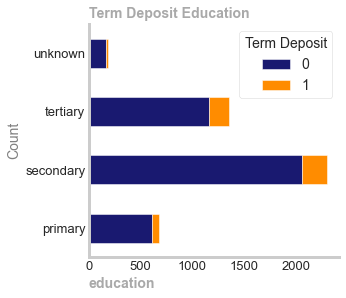

Term Deposit     0    1   All
education                    
primary        614   64   678
secondary     2061  245  2306
tertiary      1157  193  1350
unknown        168   19   187
All           4000  521  4521


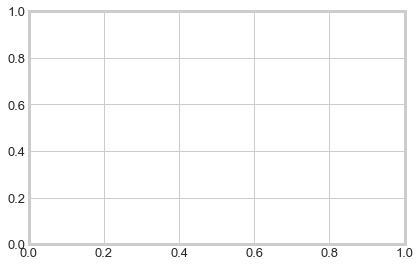

In [74]:
colors=['midnightblue','darkorange']
count_data=df.groupby(['education','Term Deposit'])['Term Deposit'].count().unstack()
count_data.plot(kind='barh', stacked=True, figsize=(4,4),color=colors)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('education',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')
plt.title('Term Deposit Education',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
sns.despine()
plt.grid(False)
plt.show()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
pd.crosstab(df['education'],df['Term Deposit'], margins=True)
contingency_table= pd.crosstab(df['education'],df['Term Deposit'], margins=True)
print(contingency_table)

In [75]:
probabilities=contingency_table.div(contingency_table['All'],axis=0)
print(probabilities)

Term Deposit         0         1  All
education                            
primary       0.905605  0.094395  1.0
secondary     0.893755  0.106245  1.0
tertiary      0.857037  0.142963  1.0
unknown       0.898396  0.101604  1.0
All           0.884760  0.115240  1.0


Observation- We observe that cutomers with an education beyond secondary have a 14% proability of having a term deposit

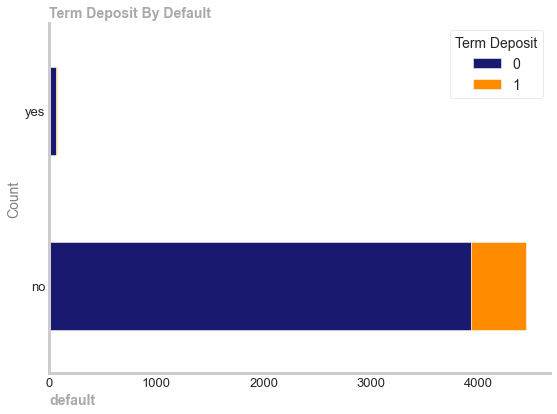

In [76]:
colors=['midnightblue','darkorange']
count_data=df.groupby(['default','Term Deposit'])['Term Deposit'].count().unstack()
count_data.plot(kind='barh', stacked=True, figsize=(8,6),color=colors)
plt.xlabel('default',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')
plt.title('Term Deposit By Default',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.despine()
plt.grid(False)
plt.show()

Observation- This is interesting the hypotheis would that anybody opening a Term Deposit has excess cash. A person who rents is nearly twice as likely to have term deposit than a person who owns a house. This would suggest that the social housing policy priortises the rental market over the house owning market.

# Binomial Distribution

In [77]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term Deposit,Qtr
0,20-29,unemployed,married,primary,no,501-1000,no,no,cellular,19,10,79,1,-1,0,unknown,0,4


In [78]:
total_signed_up=len(df[df['Term Deposit']==1])
total_contacts=len(df)
Conversion_rate=(total_signed_up/total_contacts)*100
print("The Conversion Rate from the previous marketing campaign is: {:.2f}%".format(Conversion_rate))

The Conversion Rate from the previous marketing campaign is: 11.52%


Assume that we as data scientists entrusted with enhancing the banks ROI (Return on Investment), where staff members try to convince potential clients to buy our product such as Term Deposits over the phone.

We can consider the employees who made the calls to the banks customers as  a subset of out data as their role is crucial when ascertaing the return on investment We can consider every employee to be a randomly distributed binomially with certain parameters. Each employee performance in our situation can be represented as a binomial distribution with the following parameters:

Number of Trials (n): This can inform how many attempts or assignments each worker completes. Within the context of our bank this could refer to the quantity of calls that each staff made throughout the day.

Probability Of Sucess(p).: This is the likelihood that any given endeavour or task will be completed successfully. Within the bank setting, this would refer to the likeihood that a call make by an employee results in a customer opening a term deposit account.

For instance we can model each employees daily performance as a binomial distribution with parameters (n=50, p=0.11) if we have 100 employees each one makes 50 calls a day with a 11% success rate (conversion rate from a previous marketing campaign).

By taking into consideration the total performance of all employees over a number of days we can use this modelling to analyse and simulate the banks  overall performance. According to these binomial distributions the combined performance of all employees is represented by the histogram with the profits in the code.

This methods aids in our compresenion of the distributionn and variaability of results depending on the performance of each individual employee as a binomial random variable.

In [79]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term Deposit,Qtr
0,20-29,unemployed,married,primary,no,501-1000,no,no,cellular,19,10,79,1,-1,0,unknown,0,4


In [80]:
df.shape

(4521, 18)

We will make some assumptions for modeling purposes such as number of employees & wage costs. However we do know the previous campaign resulted in a 11% conversion rate. We also know from previous caluclations that the total on normal deposits in the bank is in the region of 6.4 million euros. We also know that portuguese banks have a historical net interest margin of 2.7%.When a customer opens a 5 term account the bank can lend this money out to other customers and earn revenue and ultimately profit. The profit is the net interest margin. At 2.7% we can deduce that if the bank were to get every customer to open a term deposit the profit would in the region of 180k euros. At a conversion rate of 11% the bank have only got 20k of the 180k open to them. On a 5 year term that would equate to 30k per year with over 4521 acounts we could say that the every conversion would generte 7 euros per customer per year over a 5 year time horison

We will make these assumptions as our benchmark

In [81]:
employees = 20 # 20 employees workin in marketing

# Cost per employee 50 euros per day
wage = 50

# Number of independent calls per employee
n = 50

# Probability of success for each call
p = 0.11

# Revenue per call
revenue = 7

# Binomial random variables of call center employees
conversions = np.random.binomial(n, p, size=employees)

# Print some key metrics of our call center
print('Average Conversions per Employee: ' + str(round(np.mean(conversions), 2)))
print('Standard Deviation of Conversions per Employee: ' + str(round(np.std(conversions), 2)))
print('Total Conversions: ' + str(np.sum(conversions)))
print('Total Revenues: ' + str(np.sum(conversions)*revenue))
print('Total Expense: ' + str(employees*wage))
print('Total Profits: ' + str(np.sum(conversions)*revenue - employees*wage))

Average Conversions per Employee: 5.3
Standard Deviation of Conversions per Employee: 1.95
Total Conversions: 106
Total Revenues: 742
Total Expense: 1000
Total Profits: -258


The above code simulates using binomial distribution of a marketing campaign with 20 employees.This can help us understand and give us insights into the performance of out marketing campaign. We can observe the average conversions per employee and the overall financial profits. We can see that the current marketing campaign is running at a loss working on the basis these calls were made on one day.

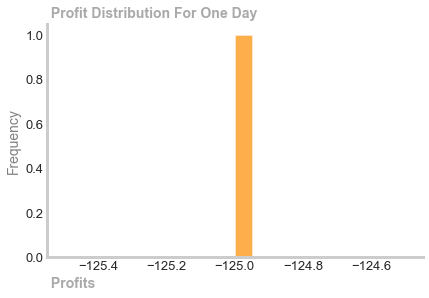

In [82]:
employees=20
wage=50
n=50
p=.11
revune = 7
conversions=np.random.binomial(n,p, size= employees)
profits=np.sum(conversions) * revenue - employees * wage
plt.hist(profits, bins=20, color='darkorange', alpha=0.70)
plt.xlabel(' Profits',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Frequency',fontsize=14,color= 'grey')
plt.title(' Profit Distribution For One Day',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.despine()
plt.grid(False)
plt.show()

# Tony Yiu,2019.Fun with the Binomial Distribution..Available at: https://medium.com/towards-data-science/fun-with-the-

Our decision-making, resource allocation and performance review can all be influenced by our observed  metrics. The banks objective is to boost profits, in this instance we may think about methods to raise overall revenue or conversion, cut costs or do  both at the same time. Monitoring these indicators over time can also assist us in spotting trends and make data driven decisions to improve the banks performance.

we will run our binomial distribution over a year

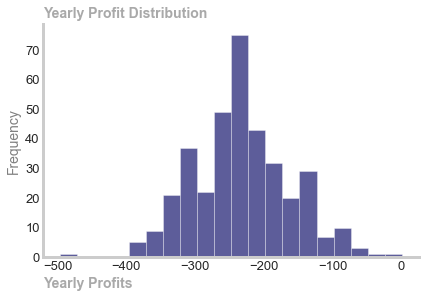

Average Yearly Conversions per employee: 5.49
 Total Yearly Profits: -84573


In [83]:
days_in_year=365
employees = 20
wage = 50
n = 50
p = 0.11
revenue = 7
average_conversions_per_employee=[]
total_profits=[]
for day in range(days_in_year):
    conversions=np.random.binomial(n,p, size=employees)
    
    avg_conversions=np.mean(conversions)
    total_profit=np.sum(conversions) * revenue - employees * wage
    
    average_conversions_per_employee.append(avg_conversions)
    total_profits.append(total_profit)    
plt.hist(total_profits, bins=20, color='midnightblue', alpha=0.70)
plt.xlabel('Yearly Profits',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Frequency',fontsize=14,color= 'grey')
plt.title('Yearly Profit Distribution',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
sns.despine()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(False)
plt.show()
average_yearly_conversions=np.mean(average_conversions_per_employee)
total_yearly_profits= sum(total_profits)
print('Average Yearly Conversions per employee: {:.2f}'.format(average_yearly_conversions))
print(' Total Yearly Profits: {}'.format(total_yearly_profits))

# Tony Yiu,2019.Fun with the Binomial Distribution..Available at: https://medium.com/towards-data-science/fun-with-the-

We can observe that if run this campaign using existing parameters the bank will lose 84k

In this situation there are only two variables the bank can control the wages it pays its staff or by increasing the effectinvess of its marketing. If we estimate that we can increase the probability of success lets run  the  binomial distribution again.

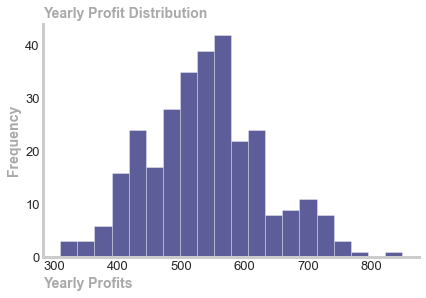

Average Yearly Conversions per employee: 10.99
 Total  Profits for Marketing Campaign: 161384


In [84]:
days_in_year=300
employees = 20
wage = 50
n = 50
p = 0.22
revenue = 7
average_conversions_per_employee=[]
total_profits=[]
for day in range(days_in_year):
    conversions=np.random.binomial(n,p, size=employees)
    
    avg_conversions=np.mean(conversions)
    total_profit=np.sum(conversions) * revenue - employees * wage
    
    average_conversions_per_employee.append(avg_conversions)
    total_profits.append(total_profit)
common_figsize=(8,6)    
plt.hist(total_profits, bins=20, color='midnightblue', alpha=0.70)
plt.xlabel('Yearly Profits',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Frequency',fontsize=14,fontweight='bold',color='darkgrey')
plt.title('Yearly Profit Distribution',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
sns.despine()
plt.grid(False)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

average_yearly_conversions=np.mean(average_conversions_per_employee)
total_yearly_profits= sum(total_profits)
print('Average Yearly Conversions per employee: {:.2f}'.format(average_yearly_conversions))
print(' Total  Profits for Marketing Campaign: {}'.format(total_yearly_profits))

# Tony Yiu,2019.Fun with the Binomial Distribution..Available at: https://medium.com/towards-data-science/fun-with-the-binomial-distribution-96a5ecabf65b [Accesed] 7-11-2023]

We estimated earlier that if the bank could get every customer to sign up for a term deposit there was a potential profit of 162k. By using binomial distribution we can this is possibe to achieve in 300 days if we increase our conversion rate from 11% to 22% 

# Normal Distribution

In [85]:
mean_age=df_num['age'].mean()
median_age=df_num['age'].median()
std_age=df_num['age'].std()
skew_df=df_num['age'].skew()
kurtosis_df=df_num['age'].kurtosis()
percentiles= [0.25,0.50,0.75]
age_percentiles= df_num['age'].quantile(percentiles)

print(f"Mean Age is:{mean_age}")
print(f"Median Age is:{median_age}")
print(f"Standard Deviation is:{std_age}")
print(f"Median Age is:{median_age}")
print(f"Skew is:{skew_df}")
print(f"kurtosis is:{kurtosis_df}")
print('Age Percentiles')
for percentile, age_value in zip(percentiles,age_percentiles):
    print(f"{percentiles}th Percentile: {age_value}")

Mean Age is:41.17009511170095
Median Age is:39.0
Standard Deviation is:10.576210958711275
Median Age is:39.0
Skew is:0.6995014533559305
kurtosis is:0.3487754872611486
Age Percentiles
[0.25, 0.5, 0.75]th Percentile: 33.0
[0.25, 0.5, 0.75]th Percentile: 39.0
[0.25, 0.5, 0.75]th Percentile: 49.0


In [86]:
df1=pd.read_csv("Bank_Mkt_Campaign (1).csv")

In [87]:
df1.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no


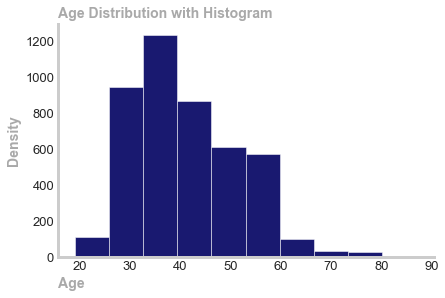

In [88]:
common_figsize=(8,6)
df1['age'].hist(color='midnightblue')
plt.xlabel('Age',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Density',fontsize=14,fontweight='bold',color='darkgrey')
plt.title('Age Distribution with Histogram',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
sns.despine()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(False)

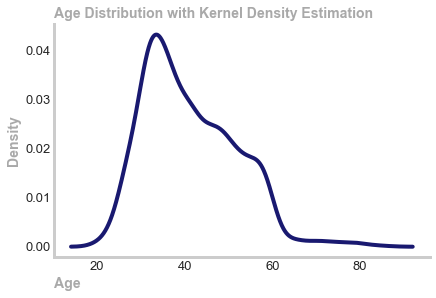

In [89]:
common_figsize=(8,6)
age=df1['age'].values
kde=KernelDensity(bandwidth=2.0,kernel='gaussian')
kde.fit(age[:, np.newaxis])
x=np.linspace(age.min() -5,age.max() +5,1000)
log_dens=kde.score_samples(x[:,np.newaxis])
plt.plot(x,np.exp(log_dens),color='midnightblue')
plt.xlabel('Age',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Density',fontsize=14,fontweight='bold',color='darkgrey')
plt.title('Age Distribution with Kernel Density Estimation',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.despine()
plt.grid(False)

#unknown,unknown.Simple 1D Kernel Density Estimation..Available at: https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html [Accesed] 7-11-2023]

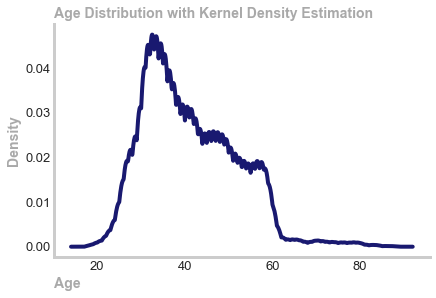

In [90]:
common_figsize=(8,6)
age=df1['age'].values
kde=KernelDensity(bandwidth=2.0,kernel='epanechnikov')
kde.fit(age[:, np.newaxis])
x=np.linspace(age.min() -5,age.max() +5,1000)
log_dens=kde.score_samples(x[:,np.newaxis])
plt.plot(x,np.exp(log_dens),color='midnightblue')
plt.xlabel('Age',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Density',fontsize=14,fontweight='bold',color='darkgrey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Age Distribution with Kernel Density Estimation',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
sns.despine()
plt.grid(False)

#unknown,unknown.Simple 1D Kernel Density Estimation..Available at: https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html [Accesed] 7-11-2023]

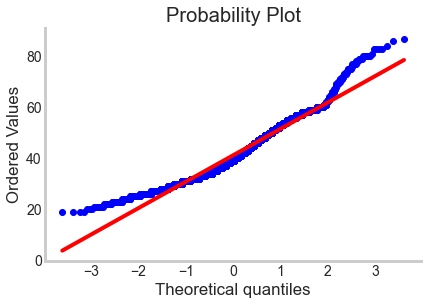

In [91]:
import scipy.stats as stats
import pylab
common_figsize=(8,6)
stats.probplot(df1['age'], plot=pylab);
sns.despine()
plt.grid(False)


#unknown,unknown.Mathematics - Statistics & Probability mastery for Data Science, Machine Learning..Available at: https://www.udemy.com/course/statistics-probability-for-data-science/learn/lecture/35290462#overview [Accesed] 1-11-2023]


We can observe from our various graphs that our Age variable is highly skewed to the right. 

1- Mean age of our population is 41.17 years

2- Median age of our population is 39.00 years

3- Standard deviation is 10.58 years this would suggest that the ages in our population are not tightly clustered around the mean but are are spread out.

4- Age percentiles 75% of our population are under the age of 49 years

5- Skew .69 suggests that our population is postively skewed meaning we have a long tail to the right, it indicates the majority have ages below the mean of 41,17 years.

6- We can observe from our visualiations that the data is skewed, We have also completedt a QQ plot. we would expect in a normal distribution that all the data points would fall on the red line.

Any models that we may use would assume that they are working with a normally distributed dataset and if we wanted to use these modes we could use a log transformation to normalize our data.

# Conclusion

We have been tasked with developing a mareting campaing for a bank. We have been given date that relates to a marketing campaign that was previously undertaken.

We have carried out data analytics on the data and by using statistics and proabilties that can be used to develop a marketing campaign which is more effective and a result increase profits within the bank.

we will detail our main takeaways from our analysis.

1-The conversion rate on the orignal marketing was 11%

2-Age percentiles 75% of our population are under the age of 49 years

3-we can say that if a person opens a term deposit there is an 82% proability they will be from the 20-49 age cohort.

4- The previous campaign was ineffective in communicating prioritize higher income groups.

5- A person who does not own is nearly twice as likely to open a term deposit as compared to a person who owns a home

6- There is only a 7% proability of a blue collar worker opening a Term Deposit

7 - 75% of our the banks customers have a cash balance of 1480.00 euros or under 

8- Our estimate that the bank is losing 84k per year as the costs associated with opening a term deposit outweigh the revenue made.

Recommendations.

1- Target customers who fall between the age of 25-49

2- Target customers who have a balance of more than 1480.00 this can be done by accepting that all customerss can be contacted during office hours. By changing the way the bank communciates  with its customers and the the time of day and hours it will convert higher income customers to Ter Deposits.

3-Target customers who do not own their own home.

4- The bank is losing money under the current scheme, this can not continue, to money will have undertaake a cost benefit on the current scheme. Our analysis shows that it is possible to make money but only if changes are made to the current scheme. A more targeted comprenhsive marketing campaign will increase the conversion rate, by increasing the conversion rate to 22% it is possible for this marketing to make money for the bank. 


#  Bibliography

Refereces

[Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology.

unknown,unknown.Mathematics - Statistics & Probability mastery for Data Science, Machine Learning..Available at: https://www.udemy.com/course/statistics-probability-for-data-science/learn/lecture/35290462#overview [Accesed] 1-11-2023]

#Tony Yiu,2019.Fun with the Binomial Distribution..Available at: https://medium.com/towards-data-science/fun-with-the-

#unknown,unknown.Simple 1D Kernel Density Estimation..Available at: https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html [Accesed] 7-11-2023]

Nussbaumer Knaflic, C. (2015). Storytelling with data (C. N. Knaflic, Ed.). John Wiley & Sons